<a href="https://colab.research.google.com/github/Shristi0124/Image_Reacognition_with_Convolutional/blob/main/Image_Recorgnizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train),(X_test, y_test) = datasets.cifar10.load_data()

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ['airplane','automobile','bird','cat','deer', 'dog','frog','horse','ship','truck']

In [ ]:
def plot_sample(X,y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

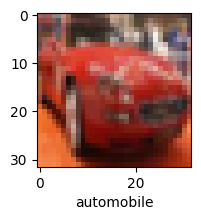

In [ ]:
plot_sample(X_train, y_train, 5)

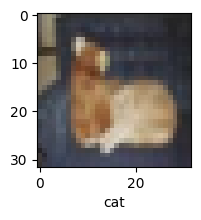

In [ ]:
plot_sample(X_train, y_train, 17)

In [ ]:
X_train = X_train/255.0
X_test = X_test /255.0

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
    ])
ann.compile(optimizer = 'SGD',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

ann.fit(X_train , y_train , epochs =5 )


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 92ms/step - accuracy: 0.3067 - loss: 1.9322
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 198s 90ms/step - accuracy: 0.4211 - loss: 1.6398
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 89ms/step - accuracy: 0.4538 - loss: 1.5501
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 90ms/step - accuracy: 0.4785 - loss: 1.4876
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 89ms/step - accuracy: 0.4931 - loss: 1.4418


In [71]:
!pip install scikit-learn

In [75]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann. predict(X_test)
y_pred_classes =  [np.argmax(element) for element in y_pred]
print('classification  report : \n ', classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
classification  report : 
                precision    recall  f1-score   support

           0       0.63      0.43      0.51      1000
           1       0.67      0.55      0.60      1000
           2       0.39      0.34      0.36      1000
           3       0.41      0.18      0.26      1000
           4       0.48      0.30      0.37      1000
           5       0.36      0.45      0.40      1000
           6       0.59      0.38      0.47      1000
           7       0.28      0.85      0.42      1000
           8       0.65      0.60      0.62      1000
           9       0.62      0.39      0.48      1000

    accuracy                           0.45     10000
   macro avg       0.51      0.45      0.45     10000
weighted avg       0.51      0.45      0.45     10000



<function matplotlib.pyplot.show(close=None, block=None)>

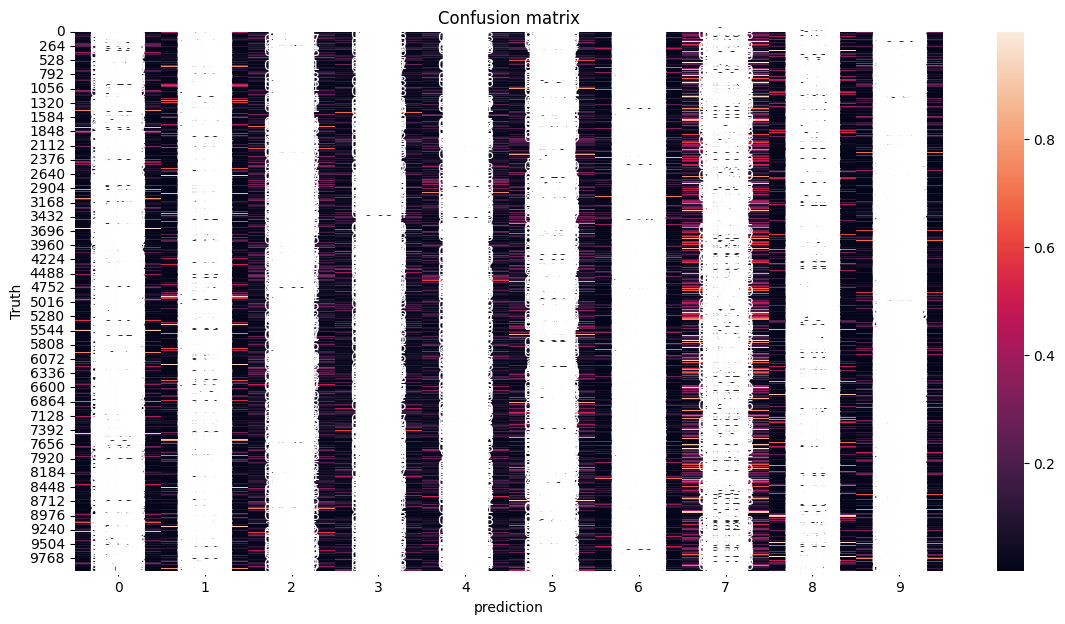

In [76]:
import seaborn as sns
plt.figure(figsize = (14,7))
sns.heatmap(y_pred, annot  = True)
plt.ylabel('Truth')
plt.xlabel('prediction')
plt.title('Confusion matrix')
plt.show

In [80]:
cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64 , kernel_size= (3,3), activation='relu'),layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation = 'softmax')
])

In [ ]:
cnn.compile(optimizeer ='adam')